In [2]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import easyocr

ModuleNotFoundError: No module named 'easyocr'

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


THE CAR NUMBER PLATE :  HR.26 BR.9044


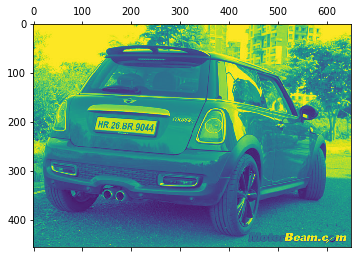

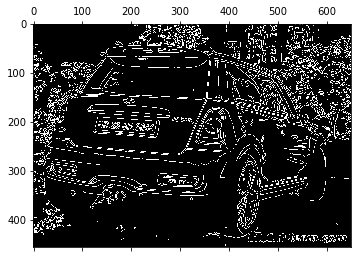

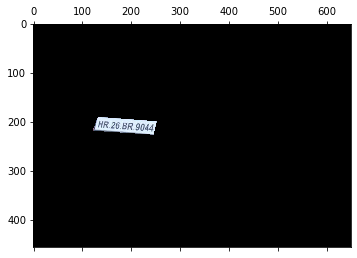

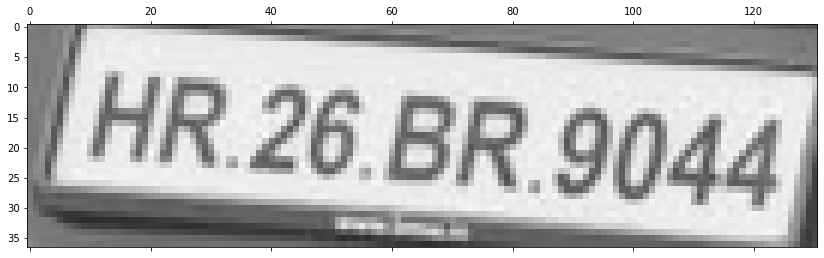

In [42]:
img=cv2.imread("C:\\Users\\91984\\Desktop\\elon\\car1.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.matshow(gray)
filter1=cv2.bilateralFilter(gray,11,17,17)
edge_detection=cv2.Canny(filter1,30,200)
plt.matshow(cv2.cvtColor(edge_detection,cv2.COLOR_BGR2RGB))
contours=cv2.findContours(edge_detection.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]
contours=imutils.grab_contours(contours)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]
location=None
for c in contours:
    approx=cv2.approxPolyDP(c,10,True)
    if(len(approx)==4):
        location=approx
        break
location
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)
plt.matshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped=gray[x1:x2+1,y1:y2+1]
plt.matshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))
detected=easyocr.Reader(['en'])
number=detected.readtext(cropped)
number
final=number[0][-2]
print("THE CAR NUMBER PLATE : ", final)


In [3]:
pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install easyocr

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
     ---------------------------------------- 12.1/12.1 MB 1.2 MB/s eta 0:00:00
  Using cached ninja-1.10.2.3-py2.py3-none-win_amd64.whl (292 kB)
  Using cached opencv_python_headless-4.5.4.60-cp39-cp39-win_amd64.whl (35.0 MB)
  Using cached Shapely-1.8.4-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached pyclipper-1.3.0.post3-cp39-cp39-win_amd64.whl (94 kB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
     ---------------------------------------- 4.2/4.2 MB 816.9 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 564.7 kB/s eta 0:00:00
     ------------------------------------ 208.5/208.5 kB 528.8 kB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import easyocr

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


THE CAR NUMBER PLATE :  HR.26 BR.9044


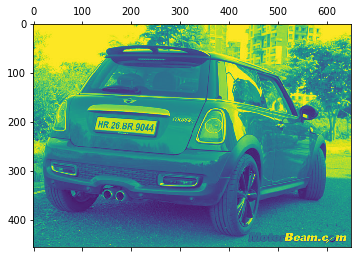

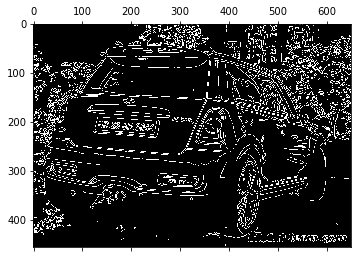

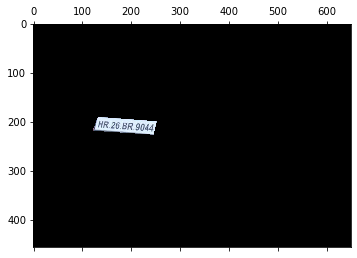

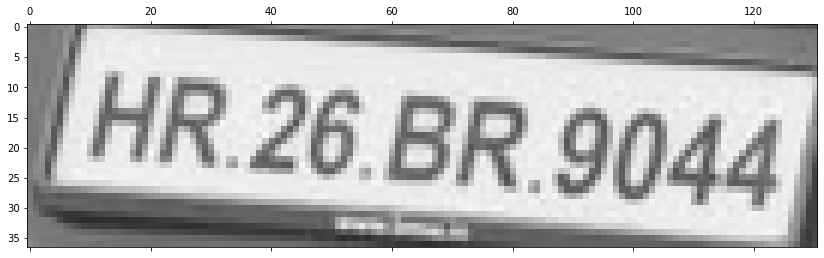

In [6]:
img=cv2.imread("C:\\Users\\91984\\Desktop\\elon\\car4.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.matshow(gray)
filter1=cv2.bilateralFilter(gray,11,17,17)
edge_detection=cv2.Canny(filter1,30,200)
plt.matshow(cv2.cvtColor(edge_detection,cv2.COLOR_BGR2RGB))
contours=cv2.findContours(edge_detection.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]
contours=imutils.grab_contours(contours)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]
location=None
for c in contours:
    approx=cv2.approxPolyDP(c,10,True)
    if(len(approx)==4):
        location=approx
        break
location
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)
plt.matshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped=gray[x1:x2+1,y1:y2+1]
plt.matshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))
detected=easyocr.Reader(['en'])
number=detected.readtext(cropped)
number
final=number[0][-2]
print("THE CAR NUMBER PLATE : ", final)


In [1]:
import cv2
import numpy as np
cap=cv2.VideoCapture("C:\\Users\\91984\\Downloads\\in.avi")
obj=cv2.createBackgroundSubtractorMOG2(history=100,varThreshold=40)
while True:
    ret,frame=cap.read()
    roi=frame[100:350,0:700]
    cv2.imshow("roi",roi)
    roi=cv2.GaussianBlur(frame,(5,5),0)
    roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    mask=obj.apply(roi)
    cv2.imshow("mask",mask)
    contours,hie=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    for c in contours:
        x,y,w,h=cv2.boundingRect(c)
        if cv2.contourArea(c)<650:
            continue
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
    cv2.imshow("video",frame)
    key=cv2.waitKey(50)
    if(key==27):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
import matplotlib.pyplot as plt
import openpyxl
import datetime
face_cascade=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_frontalface_default.xml")
eye=cv2.CascadeClassifier("C:\\Users\\91984\\Desktop\\cv\\haarcascades\\haarcascade_eye.xml")
cb=1
arr=[]

def get_cropped_img(imagepath):
    img=cv2.imread(imagepath)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    global cb
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            arr.append(roi_color)
            print(len(arr))
            path="C:\\Users\\91984\\Desktop\\trafffic.xlsx"
            workbook=openpyxl.load_workbook(path)
            sheet=workbook.active
            cb+=1
            for r in range(cb-1,cb):
                print("\n")
                for c  in range(1,2):
                     now=datetime.datetime.now()
                     sheet.cell(row=r,column=c).value=now.strftime("%y-%m-%d %H:%M:%S")
                break
                #print("the current the time : ",now.strftime("%y-%m-%d %H:%M:%S"))
            workbook.save(path)
            return arr
#crop=get_cropped_img("C:\\Users\91984\\Desktop\\New folder (2)\\elon\\elon2.jpg")
#print(crop)
path_to_data="C:\\Users\\91984\Desktop\\New folder (2)"
path_to_cr="C:\\Users\\91984\Desktop\\New folder (2)\\musk"
import os
img_dir=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)
img_dir
import shutil
cropped=[]
dict1={}
for dir1 in img_dir:
    musk=dir1.split('\\')[-1]
    for entry in os.scandir(dir1):
        count=1
        roi_color=get_cropped_img(entry.path)
        if roi_color is not None:
            crop1=path_to_cr+musk
            if not os.path.exists(crop1):
                os.makedirs(crop1)
                cropped.append(crop1)
            file=musk+str(count)+".png"
            path=crop1+"\\"+file
            for i in roi_color:
                cv2.imwrite(path,i)
            
            #dict1[musk].append(path)
            count+=1         




1


2




In [3]:
import serial                                 # add Serial library for Serial communication

Arduino_Serial = serial.Serial('com3',9600)  #Create Serial port object called arduinoSerialData
#print Arduino_Serial.readline()               #read the serial data and print it as line
print ("Enter 1 to ON LED and 0 to OFF LED")

while 1:                                      #infinite loop
    input_data = raw_input()                  #waits until user enters data
    #print ("you entered", input_data)           #prints the data for confirmation
    
    if (input_data == '1'):                   #if the entered data is 1 
        Arduino_Serial.write('1')             #send 1 to arduino
        print ("LED ON")
       
    
    if (input_data == '0'):                   #if the entered data is 0
        Arduino_Serial.write('0')             #send 0 to arduino 
        print ("LED OFF")


AttributeError: module 'serial' has no attribute 'Serial'